In [1]:
# Load necessary library and module
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [5]:
bank= pd.read_csv('review_mobile-banking_2023.csv', encoding='ISO-8859-1')
bank.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,08ea51f8-0cc4-4ddc-88b1-4debfd895c56,Kidyu,https://play-lh.googleusercontent.com/a-/AD_cM...,"""Spend Analysis"" feature is really spotty. Occ...",1,93,8.16.0,2023-04-11 15:50:51,Hello Jagoan! Sorry for the inconvinience you ...,2023-01-03 12:38:58,8.16.0,most_relevant,com.jago.digitalBanking
1,5b9748be-c910-4630-b94a-cf2f4a5d3b59,Sarah Annisa,https://play-lh.googleusercontent.com/a-/AD_cM...,Please fix the app. It's sooo lagging to move ...,1,13,8.17.0,2023-04-25 09:22:20,"Hello, Jagoan! We apologize if there are Jago ...",2023-04-25 18:20:50,8.17.0,most_relevant,com.jago.digitalBanking
2,de74d252-ab10-4e7f-a67b-6f7a1e401602,Rizki Lazuardi,https://play-lh.googleusercontent.com/a-/AD_cM...,"1. Cannot open notification, always says somet...",1,0,8.20.0,2023-07-04 08:59:32,NaN,NaN,8.20.0,most_relevant,com.jago.digitalBanking
3,655d4a7c-9318-4b2a-84c3-5f4d3515ac6e,Agus Sigit Wisnubroto,https://play-lh.googleusercontent.com/a-/AD_cM...,"Ngelag parah. The app lagging, lagging, and la...",1,0,8.19.0,2023-06-11 12:18:50,"Hai kak Agus Sigit Wisnubroto, maaf banget ya ...",2023-06-11 23:37:13,8.19.0,most_relevant,com.jago.digitalBanking
4,c573fefc-f335-4363-9bd1-894ae936c258,Rilo Rizki,https://play-lh.googleusercontent.com/a-/AD_cM...,"Phone on root with magisk, Jago is in deny lis...",1,1,8.19.0,2023-06-01 07:28:43,"Halo, Jagoan! Mohon maaf atas ketidaknyamanann...",2023-06-29 15:56:16,8.19.0,most_relevant,com.jago.digitalBanking


In [7]:
## Know the dataset

bank.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'sortOrder', 'appId'],
      dtype='object')

In [8]:
bank.shape

(9318, 13)

In [9]:
bank.dtypes

reviewId                object
userName                object
userImage               object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
appVersion              object
sortOrder               object
appId                   object
dtype: object

In [10]:
bank.isnull().sum()

reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    1201
at                         0
replyContent            1975
repliedAt               1975
appVersion              1201
sortOrder                  0
appId                      0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# Let's set the theme of plots.
sns.set_theme()
sns.set(rc={"figure.dpi":300, "figure.figsize":(12,9)})

<Axes: >

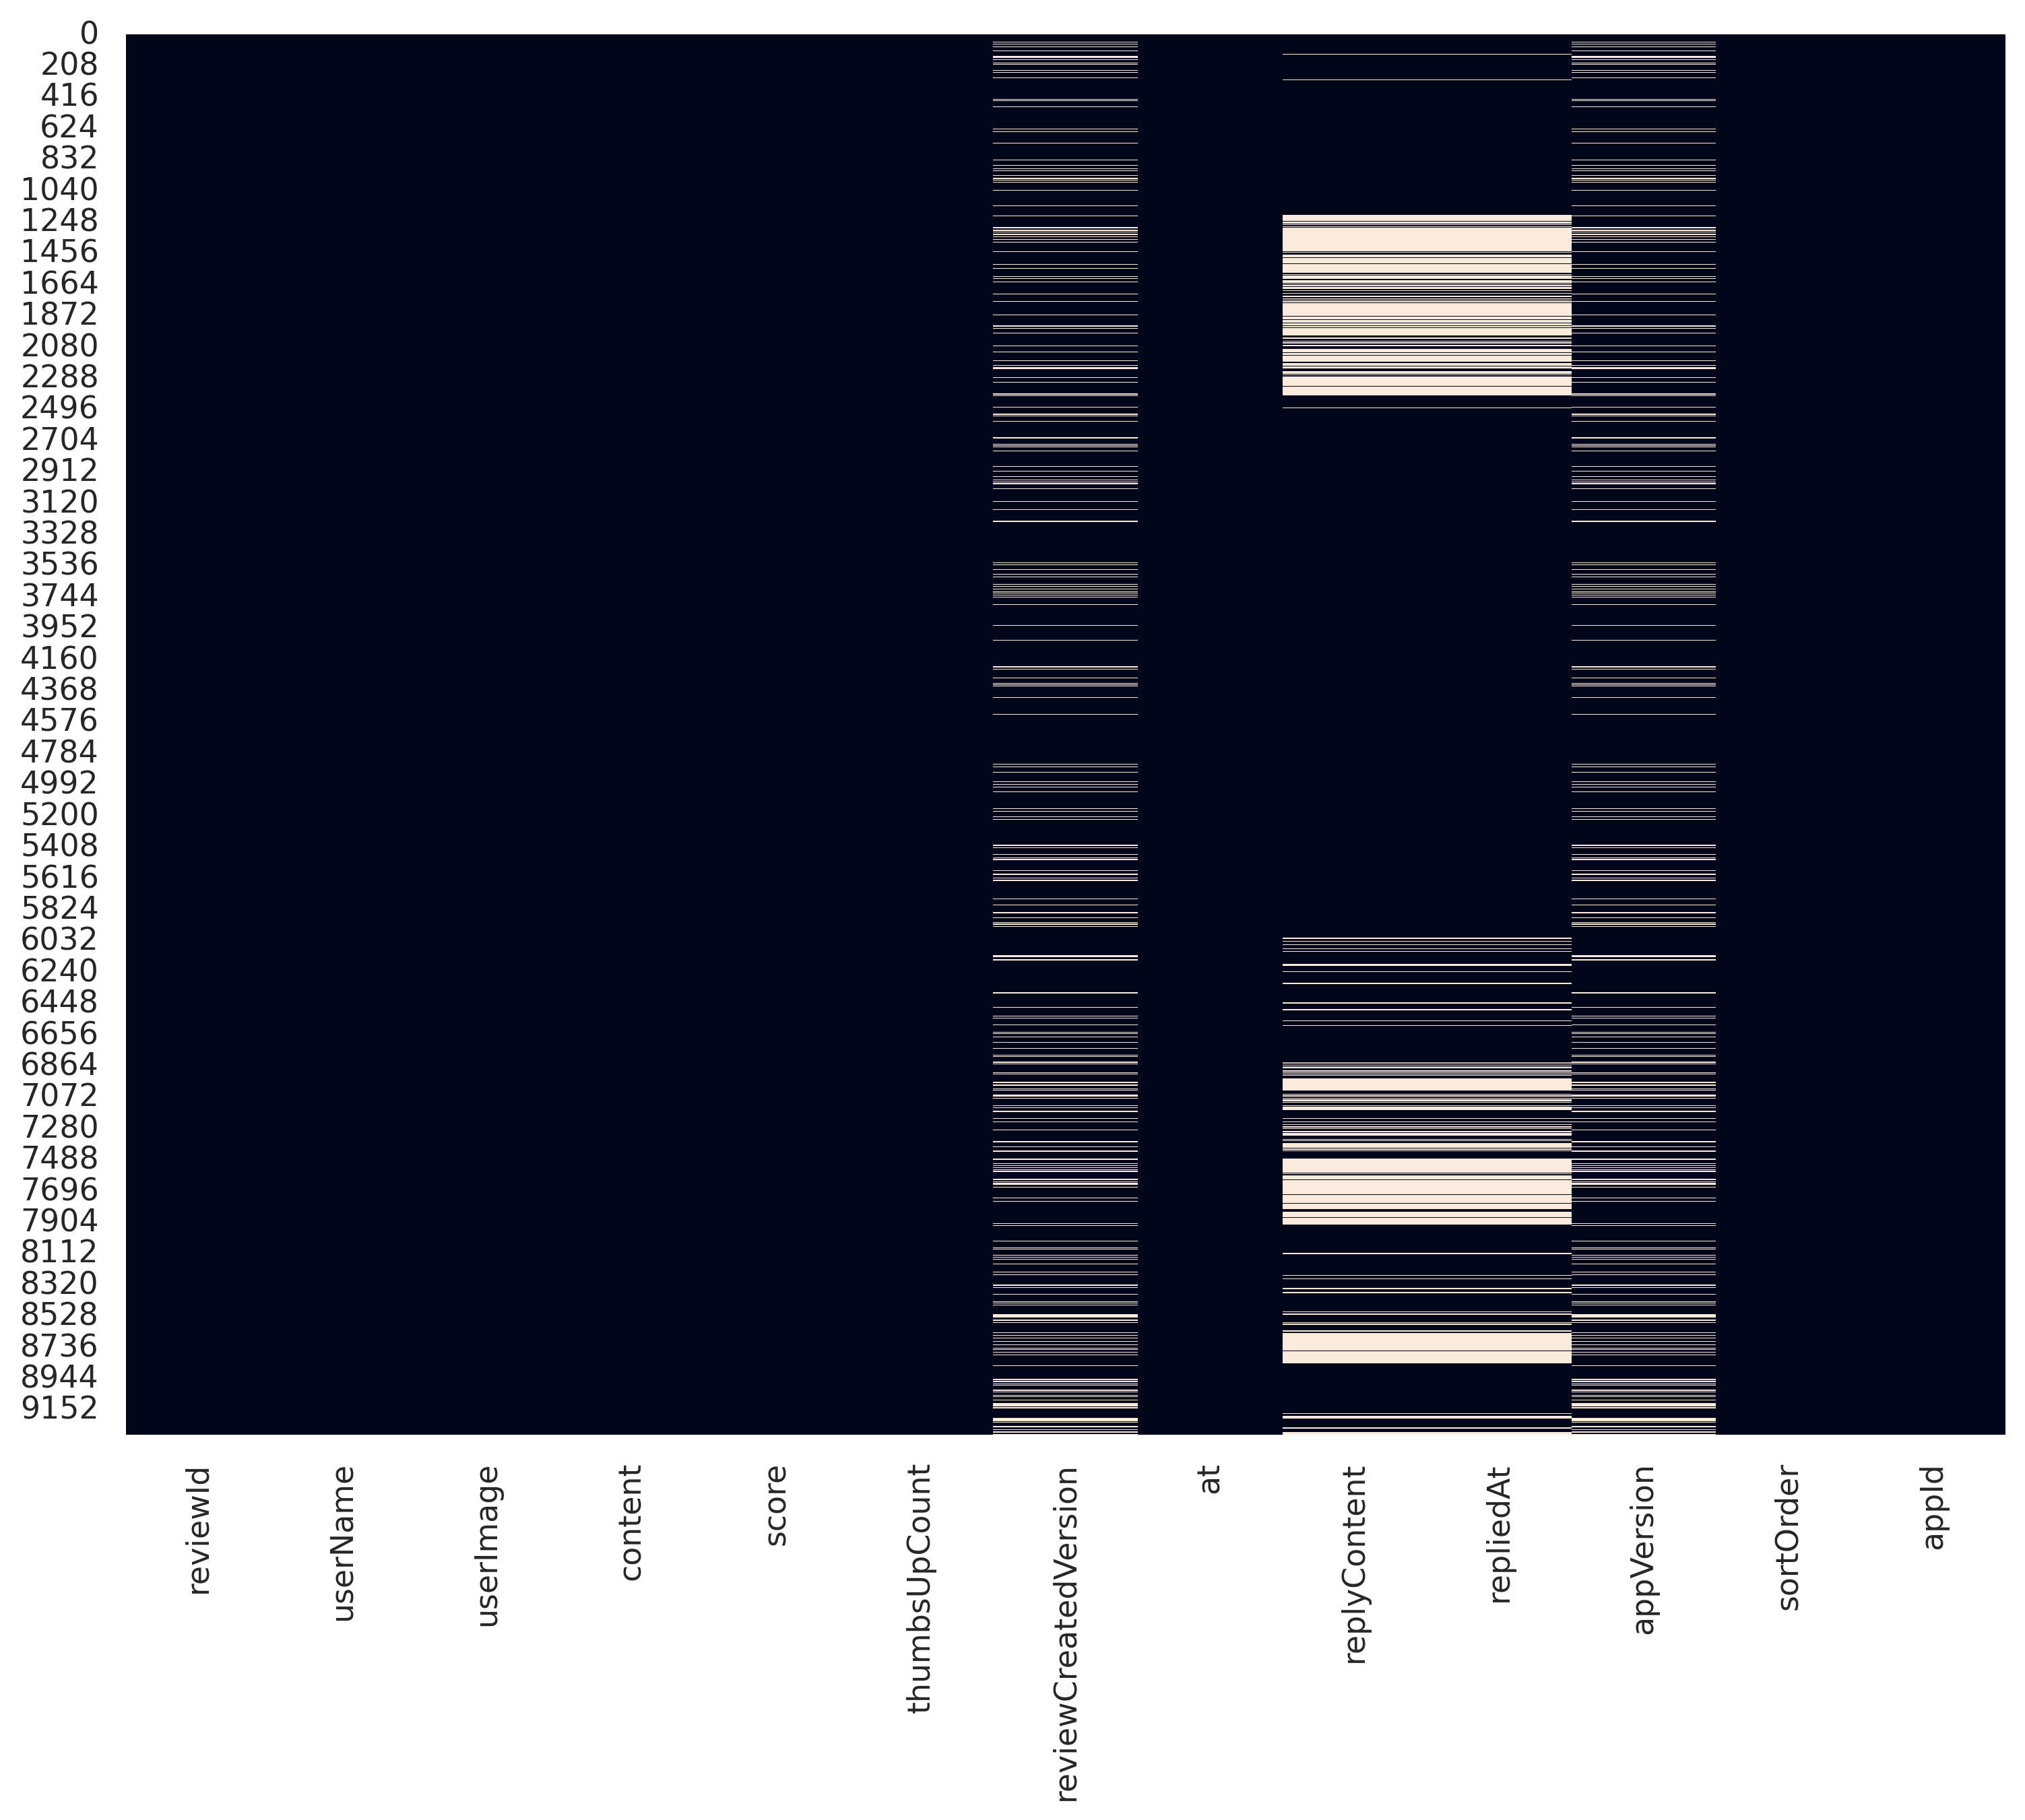

In [12]:


sns.heatmap(bank.isnull(), cbar=False)





I'm going to use the median value for missing data in the rating column. Note that the median is more robust than the mean for the outlier values.


In [14]:
rating_median = bank["score"].median()
print(rating_median)
bank["score"].fillna(rating_median, inplace=True)

3.0


In [15]:


# Let's remove the other missing data as it is very little.

bank.dropna(inplace=True)



In [16]:


# Let's take a look at missing data again.

bank.isnull().sum().sum()



0

In [21]:
bank.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6459 entries, 0 to 9308
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              6459 non-null   object
 1   userName              6459 non-null   object
 2   userImage             6459 non-null   object
 3   content               6459 non-null   object
 4   score                 6459 non-null   int64 
 5   thumbsUpCount         6459 non-null   int64 
 6   reviewCreatedVersion  6459 non-null   object
 7   at                    6459 non-null   object
 8   replyContent          6459 non-null   object
 9   repliedAt             6459 non-null   object
 10  appVersion            6459 non-null   object
 11  sortOrder             6459 non-null   object
 12  appId                 6459 non-null   object
dtypes: int64(2), object(11)
memory usage: 706.5+ KB


In [19]:
# Handling the review column

bank["content"].describe()

count     6459
unique    4720
top       Good
freq        22
Name: content, dtype: object

In [30]:
bank['score'].describe().round()

count    6459.0
mean        3.0
std         1.0
min         1.0
25%         2.0
50%         3.0
75%         4.0
max         5.0
Name: score, dtype: float64

In [34]:
print(len(bank['content'].unique()))
#bank['content'].unique()

4720


In [37]:
print(len(bank['thumbsUpCount'].unique()))
bank['thumbsUpCount'].unique()

124


array([ 93,  13,   0,   1,  16,   6,   3,   4,   5,  20,  11,  12,  10,
         7,  35,   2,   9,  48,  23,  45,  15,   8,  32,  24,  27,  19,
        26, 150,  41,  42,  38,  43,  14, 113,  97,  64,  18,  44,  66,
       170,  22,  84,  71, 216,  95, 100,  30,  62,  75,  49,  59, 161,
        70,  94,  34,  31,  81,  28,  39,  54,  40,  89,  33,  72,  47,
        36,  57,  25,  17,  61, 105,  74,  63, 525, 356, 177, 115, 335,
       189, 153, 264, 145,  52, 205,  29,  51,  55, 107, 109, 188,  92,
       393, 127,  98, 255, 168,  53,  58, 179,  46, 128, 154, 119,  96,
        21,  37, 181,  56,  83,  67, 146, 200,  73, 112,  85, 180, 104,
        60,  80,  69, 282,  99, 164, 234])